# South African Language Identification Hack 2023

# Honor Code

I confirm - by submitting this document - that the solutions in this notebook, and subsequently my score on the leaderboard, are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

# ExploreAI Academy Classification Hackathon

# Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

# Import Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
# Libraries for data preparation and model building

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.sparse import hstack
%matplotlib inline
import seaborn as sns
import re
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

sns.set()
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')  

# Load Data

In [2]:
#LOADING TRAIN AND TEST DATA

df_test = pd.read_csv(r"C:\Users\princ\Downloads\south-african-language-identification-hack-2023\test_set.csv")
df_train = pd.read_csv(r"C:\Users\princ\Downloads\south-african-language-identification-hack-2023\train_set.csv")

#sample submition data

df_sample = pd.read_csv(r"C:\Users\princ\Downloads\south-african-language-identification-hack-2023\sample_submission.csv")
    

In [3]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [4]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [6]:
df_train.head()
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


# EDA

In this chapter of the note book , we will be exploring and analysing data is in the presented files above , from both train and test data. There is graphical and non-graphical analysis.

 # non-graphical analysis

In [7]:
df_train.shape  #shape of our function is the defination of rows and columns , thhis is for the train data

(33000, 2)

In [8]:
df_test.shape  #rows and columns for the test data count

(5682, 2)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [10]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [11]:
df_train.isnull().sum()  #to check null valeus in the train data

lang_id    0
text       0
dtype: int64

In [12]:
df_test.isnull().sum() #to check null valeus in the test data

index    0
text     0
dtype: int64

THERE ARE NO NULL VALEUS IN BOTH DATA SETS

In [13]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [14]:
df_test.describe()

,index
count,5682.000000
mean,2841.500000
std,1640.396446
min,1.000000
25%,1421.250000
50%,2841.500000
75%,4261.750000
max,5682.000000


In [15]:
df_sample.describe()

,index
count,2.000000
mean,1.500000
std,0.707107
min,1.000000
25%,1.250000
50%,1.500000
75%,1.750000
max,2.000000


In [16]:
#checks columns available in the train data set
df_train.columns

Index(['lang_id', 'text'], dtype='object')

In [17]:
#checks columns available in the test data set
df_test.columns

Index(['index', 'text'], dtype='object')

In [18]:
#checks the last 5 rows of the data
df_train.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


tail() will display the last 5 observations of the dataset

In [19]:
#checks the last 5 rows of the data
df_test.tail()

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [20]:
#Checking for duplicates in the test data
df_train.nunique()

lang_id       11
text       29948
dtype: int64

In [21]:
#Checking for duolicates in the test data
df_test.nunique()

index    5682
text     5459
dtype: int64

Describe(include=’all’) provides a statistics summary of all data, include object, category etc:

In [22]:
#Statistics summary of all train data
df_train.describe(include='all').T

,count,unique,top,freq
lang_id,33000,11,xho,3000
text,33000,29948,ngokwesekhtjheni yomthetho ophathelene nalokhu...,17


In [23]:
#Using value_counts()command to understand the distribution of categories for the train data.
df_train.value_counts()

lang_id  text                                                                                                                                                                                                                                                                                             
nbl      ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le                                                  17
         ukubhalelwa kuzalisa iimfuneko zomthetho ophathelene nalokhu kungawufelelisa umrholwakho naweqisa iinyanga ezintathu ngokulandelana ungawuthathi umrholwakho nakhona uzakufelela umrholo owuthole ngokungakafaneli kufuze uwubuyise                                                                  14
         imali osalele ngayo emva nayo seyifakiwe emrholweni wakho wokuthoma nakungenzeka u

In [24]:
#Using value_counts()command to understand the distribution of categories for the test data.
df_test.value_counts()

index  text                                                                                                                                                                                                                                                     
1      Mmasepala, fa maemo a a kgethegileng a letlelela kgato eo.                                                                                                                                                                                                   1
3818   a ka tsenngwang mo tirisong.                                                                                                                                                                                                                                 1
3794   nyimele dza muthu dza mahoro, nga maan.                                                                                                                                                                             

# Graphical Analysis

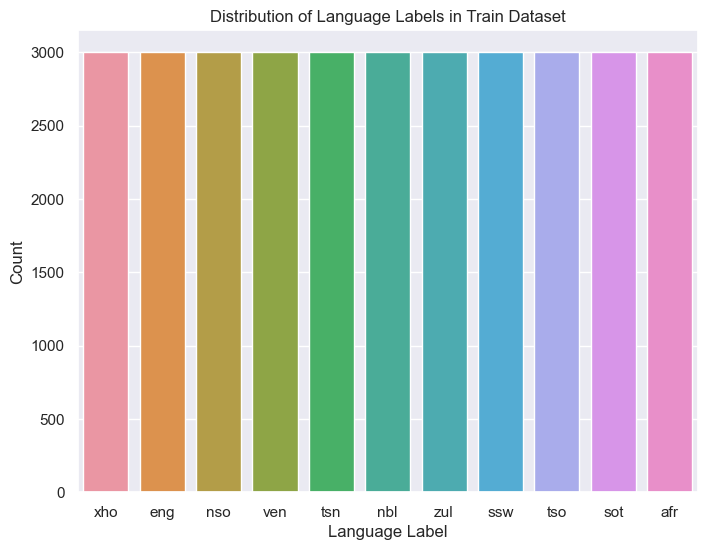

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="lang_id", data=df_train)
plt.title("Distribution of Language Labels in Train Dataset")
plt.xlabel("Language Label")
plt.ylabel("Count")
plt.show()


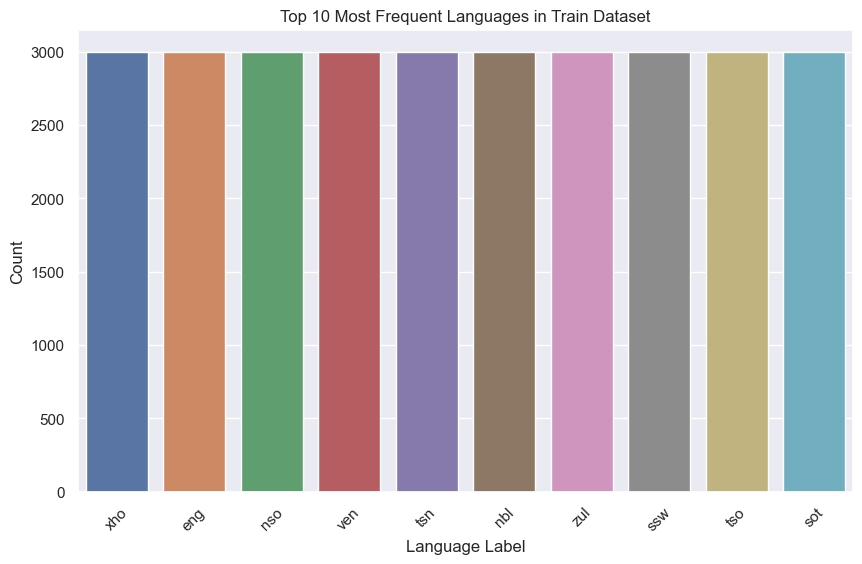

In [26]:
top_languages = df_train["lang_id"].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title("Top 10 Most Frequent Languages in Train Dataset")
plt.xlabel("Language Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


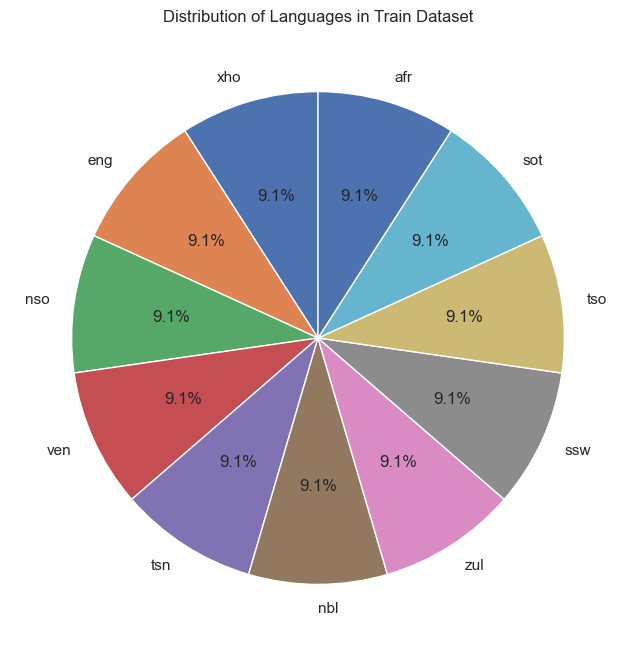

In [27]:
import matplotlib.pyplot as plt

# Calculate the count of each language label in the train dataset
language_counts = df_train["lang_id"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Languages in Train Dataset")
plt.show()


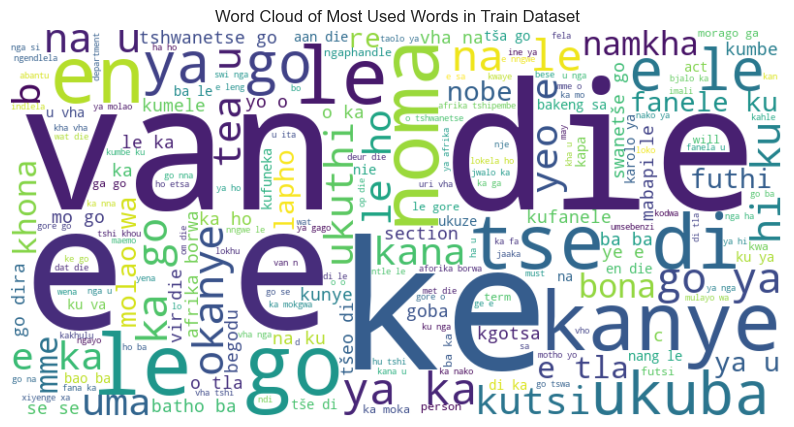

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
all_text = " ".join(df_train["text"])

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Used Words in Train Dataset")
plt.show()


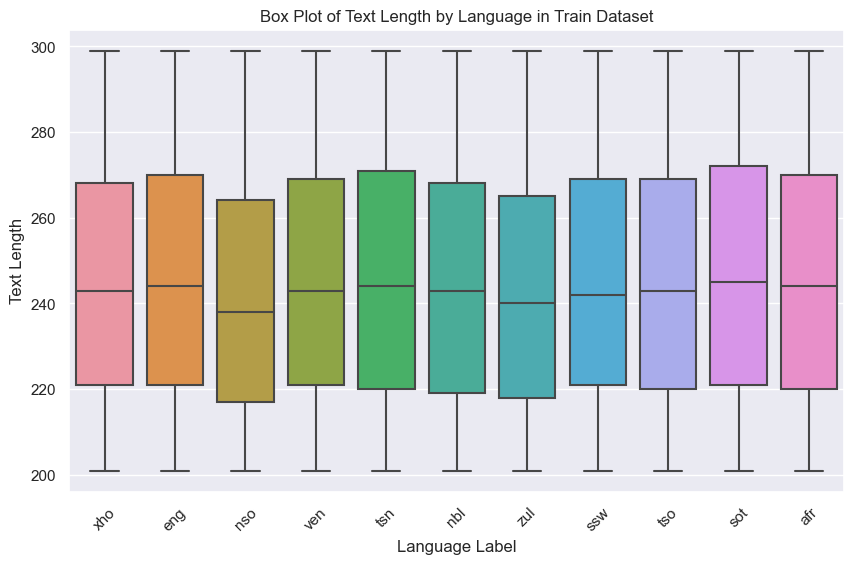

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the text lengths for each row in the train dataset
df_train["text_length"] = df_train["text"].apply(len)

# Create a box plot for text lengths by language in the train dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x="lang_id", y="text_length", data=df_train)
plt.title("Box Plot of Text Length by Language in Train Dataset")
plt.xlabel("Language Label")
plt.ylabel("Text Length")
plt.xticks(rotation=45)
plt.show()


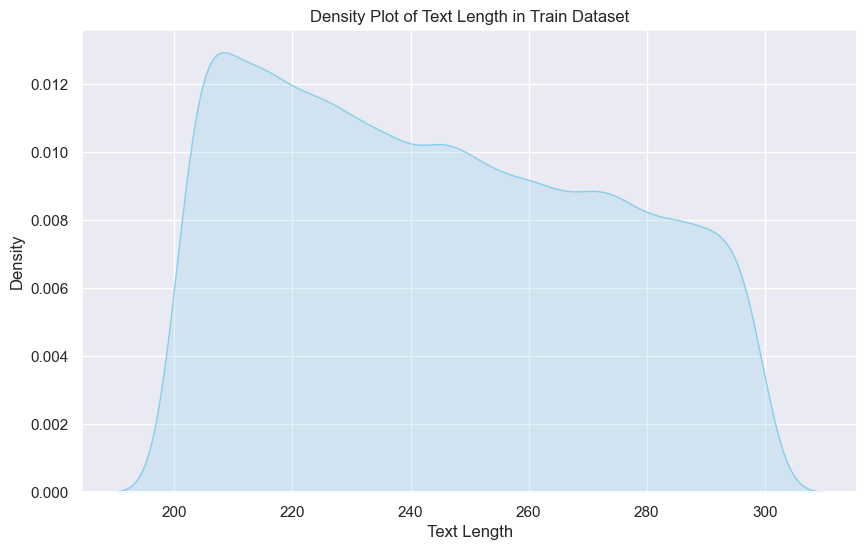

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the text lengths for each row in the train dataset
df_train["text_length"] = df_train["text"].apply(len)

# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train["text_length"], fill=True, color="skyblue")
plt.title("Density Plot of Text Length in Train Dataset")
plt.xlabel("Text Length")
plt.ylabel("Density")
plt.show()


# Data Enginearing

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Loading my train data again for more accuracy and to eliminate any errors that might arise within my notebook
df_train = pd.read_csv("train_set.csv")

# Feature Engineering: Now I am creating TF-IDF features from text
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features
X = vectorizer.fit_transform(df_train["text"])

# Encode language labels
y = df_train["lang_id"]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.9632
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.91      0.91      0.91       583
         nso       1.00      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.90      0.93      0.92       584
         tsn       0.99      0.99      0.99       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.93      0.90      0.92       609
         zul       0.88      0.88      0.88       590

    accuracy                           0.96      6600
   macro avg       0.96      0.96      0.96      6600
weighted avg       0.96      0.96      0.96      6600



# Model Evaluation



The Model evaluation for this results of my model prediction are as follows

Validation Accuracy: 96.32%  
Precision: The proportion of correctly predicted positive instances (languages) out of all predicted positive instances.





Recall: The proportion of correctly predicted positive instances (languages) out of all actual positive instances.
F1-score: The harmonic mean of precision and recall, providing a balanced measure.

# Conclusion

It is with outmost pride to present this model and say that it has a best prediction based on its accuracy rate.
South Africa is indeed a multi lingual country as we areable to pick up different language labels and in which language the texts belongs to 
